## Let's start exploring people's behavior on roads during 2016

In [1]:
import bq_helper as bqh

traff_info = bqh.BigQueryHelper(active_project="bigquery-public-data",
                                dataset_name="nhtsa_traffic_fatalities")
traff_info.head("accident_2015",10)

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,34,New Jersey,340090,2,1,1,0,0,1,1,...,26,0,None,0,None,0,None,1,1,2015-04-05 21:05:00+00:00
1,35,New Mexico,350112,1,1,0,0,0,2,2,...,99,0,None,0,None,0,None,1,1,2015-05-10 00:03:00+00:00
2,49,Utah,490197,1,1,0,0,0,3,3,...,99,0,None,0,None,0,None,1,0,2015-08-04 15:50:00+00:00
3,10,Delaware,100063,1,1,0,0,0,1,1,...,3,0,None,0,None,0,None,1,1,2015-06-13 18:41:00+00:00
4,24,Maryland,240440,1,1,0,0,0,1,1,...,24,0,None,0,None,0,None,1,1,2015-12-27 19:36:00+00:00
5,4,Arizona,40141,1,1,0,0,0,3,3,...,5,0,None,0,None,0,None,2,1,2015-03-07 06:05:00+00:00
6,35,New Mexico,350123,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2015-07-18 14:45:00+00:00
7,22,Louisiana,220088,1,1,0,0,0,7,7,...,58,0,None,0,None,0,None,1,1,2015-02-28 21:12:00+00:00
8,20,Kansas,200012,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2015-01-18 10:30:00+00:00
9,12,Florida,120674,1,1,0,0,0,1,1,...,99,0,None,0,None,0,None,1,0,2015-03-27 17:45:00+00:00


1. ### Now, let's check the day(s) of the week with more accidents

In [2]:
query1 = """SELECT COUNT(consecutive_number),EXTRACT(DAYOFWEEK FROM timestamp_of_crash)
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016`
            GROUP BY EXTRACT(DAYOFWEEK FROM timestamp_of_crash)
            ORDER BY COUNT(consecutive_number) DESC
        """

worse_days = traff_info.query_to_pandas_safe(query1)
worse_days.head()


,f0_,f1_
0,6104,7
1,5352,6
2,5303,1
3,4662,5
4,4501,2


Text(0.5,1,'accidents ranked by day')

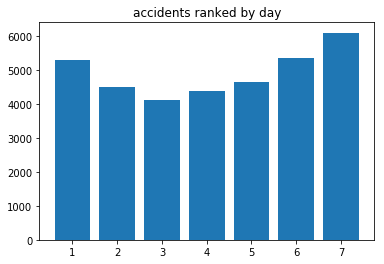

In [3]:
import matplotlib.pyplot as plt

plt.bar(worse_days.f1_,worse_days.f0_)
plt.title("accidents ranked by day")


## ** Now, we will do our job for day 3..

 ##  Which hours of the day do the most accidents occur during?

In [4]:
query2 = """SELECT COUNT(consecutive_number),
                    EXTRACT(HOUR FROM timestamp_of_crash)
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016`
            GROUP BY EXTRACT(HOUR FROM timestamp_of_crash)
            ORDER BY COUNT(consecutive_number) DESC
        """
worse_hour = traff_info.query_to_pandas_safe(query2)
worse_hour.head()

,f0_,f1_
0,1984,18
1,1919,20
2,1913,17
3,1902,19
4,1808,16


**Now let's make a graph  of the results**

Text(0.5,1,'fatalities in 2016 ranked by \n hour of the day')

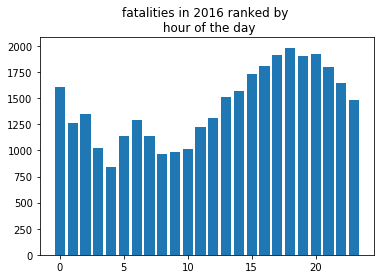

In [6]:
import matplotlib.pyplot as plt
plt.bar(worse_hour.f1_,worse_hour.f0_)
plt.title("fatalities in 2016 ranked by \n hour of the day")

## **No let's analyze the number of hit and runs per state **

In [8]:
traff_info.head("vehicle_2016")

,state_number,consecutive_number,vehicle_number,number_of_motor_vehicles_in_transport_mvit,number_of_occupants,day_of_crash,month_of_crash,hour_of_crash,minute_of_crash,first_harmful_event,...,critical_event_precrash_name,attempted_avoidance_maneuver,attempted_avoidance_maneuver_name,pre_impact_stability,pre_impact_location,crash_type,crash_type_name,fatalities_in_vehicle,driver_drinking,timestamp_of_crash
0,32,320154,1,1,1,19,7,9,45,1,...,Over the Lane Line on Right Side of Travel Lane,16,,Skidding Laterally – Counterclockwise Rotation,2,98,"MISCELLANEOUS, CONFIGURATION M: BACKING, ETC.,...",1,No Drinking,2016-07-19 09:45:00+00:00
1,6,61700,1,1,2,7,8,2,36,5,...,Other Critical Precrash Event,1,No Avoidance Maneuver,Tracking,3,0,No Impact,1,Drinking,2016-08-07 02:36:00+00:00
2,37,370166,1,1,1,8,3,15,27,19,...,Off the Edge of the Road on the Right Side,99,Unknown,Tracking,4,1,"SINGLE DRIVER, CONFIGURATION A: RIGHT ROADSIDE...",1,No Drinking,2016-03-08 15:27:00+00:00
3,40,400018,1,1,1,12,1,7,10,10,...,Object in Road,1,No Avoidance Maneuver,Tracking,1,15,"SINGLE DRIVER, CONFIGURATION C: FORWARD IMPACT...",1,No Drinking,2016-01-12 07:10:00+00:00
4,48,480672,1,1,2,20,3,18,10,5,...,Other Critical Precrash Event,99,Unknown,Tracking,1,0,No Impact,1,No Drinking,2016-03-20 18:10:00+00:00


*our query needs to identify those accidents in which the condition happened per state*****

In [9]:
query4 = """SELECT registration_state_name,COUNT(hit_and_run)
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.vehicle_2016` 
            WHERE hit_and_run  = "Yes"
            GROUP BY registration_state_name            
            ORDER BY COUNT(hit_and_run) DESC
            
           """
hr_per_state = traff_info.query_to_pandas_safe(query4)
hr_per_state.head(100)

,registration_state_name,f0_
0,Unknown,929
1,California,167
2,Texas,107
3,Florida,94
4,Georgia,44
5,Illinois,43
6,North Carolina,39
7,Ohio,39
8,Pennsylvania,32
9,Michigan,32
